In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
import os
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
dataTrain = pd.read_csv(r"C:\Users\שירה טיירי\Desktop\מטלת גמר מדעי הנתונים\archive (2)\fashion-mnist_train.csv")
dataTest = pd.read_csv(r"C:\Users\שירה טיירי\Desktop\מטלת גמר מדעי הנתונים\archive (2)\fashion-mnist_test.csv")

In [4]:
print("size of dataTrain:", dataTrain.shape)
print("size of dataTest:", dataTest.shape)

size of dataTrain: (60000, 785)
size of dataTest: (10000, 785)


In [5]:
data=dataTrain
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x = data.drop('label', axis=1) # all columns whthout prediction column 
y = data.label                 # prediction column 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)
print ("number of columns for the training:", x_train.shape,"number of columns for the test:", x_test.shape)
print ("number of prediction column for the training:",y_train.shape,"number of prediction column for the test:", y_test.shape) 

number of columns for the training: (45000, 784) number of columns for the test: (15000, 784)
number of prediction column for the training: (45000,) number of prediction column for the test: (15000,)


In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [9]:
X_test.shape

(15000, 84)

In [10]:
X_train.shape

(45000, 84)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)                  # Training of all columns and training of the prediction column
knn_predict = knn.predict(x_test)          # predictor (test)
knn_accuracy = accuracy_score(y_test, knn_predict)           # Accuracy tester compared to the test prediction column
knn_accuracy

0.8581333333333333

In [6]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(x_train,y_train)                     #training
dtree_predict=dtree.predict(x_test)
print( "accuracy:" ,accuracy_score(y_test,dtree.predict(x_test)))   #accuracy of testing

accuracy: 0.7888666666666667


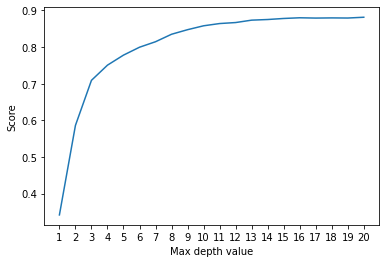

the maximum Random Forest score is: 88.15333333333332% while max depth=12


In [7]:
from sklearn.ensemble import RandomForestClassifier
arr = []
for i in range(1,21):
    ran = RandomForestClassifier(max_depth=i)
    ran.fit(x_train, y_train)
    ran_predict = ran.predict(x_test)
    arr.append(accuracy_score(y_test, ran_predict))

plt.plot(range(1,21), arr)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Max depth value")
plt.ylabel("Score")
plt.show()

ran_accuracy = max(arr)
print ("the maximum Random Forest score is: " + str(ran_accuracy*100) + "% while max depth=12")

In [8]:
def pred(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy_score(y_test, prediction)
    print("model: ", model)
    print("Accuracy: ", accuracy_score(y_test, prediction)*100 +"%")

In [14]:
from sklearn.ensemble import AdaBoostClassifier
pred(AdaBoostClassifier())

model:  AdaBoostClassifier()
Accuracy:  49.27333333333333
AdaBoost accuracy: None%


In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(x_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 59.24666666666667%


In [ ]:
xgb = xgb.XGBClassifier()

In [ ]:
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(x_train, y_train)
pip_predict = pip.predict(x_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(X_train, y_train)
vot_predict = vot.predict(X_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

In [ ]:
from sklearn.decomposition import PCA
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada.fit(X_train, y_train)
    AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada_predict = ada.predict(X_test)
    arr.append(accuracy_score(y_test, ada_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ada_pca = max(arr)
print ("the maximum  AdaBoost score is: " + str(ada_pca) + "% while n_components=6")
לשנות טווח ולקחת דיוק טוב אולי עם הטווח הזה הוא יהיה מדויק יותר